<a href="https://colab.research.google.com/github/jamieaconn/isthedartrunning/blob/master/radarcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import imageio
import requests as r
import pandas as pd
import numpy as np
import tensorflow
import h5py


In [31]:
train_df = pd.read_csv('drive/MyDrive/train.csv')
train_df['timestamp'] = pd.to_datetime(train_df['Unnamed: 0'])
train_df = train_df.set_index('timestamp')


In [18]:
f = h5py.File('drive/MyDrive/images.h5','r')
train_images = f['train'][:]
f.close()

In [21]:
sample_map = imageio.imread('drive/MyDrive/SampleUKMap.png')

719.25

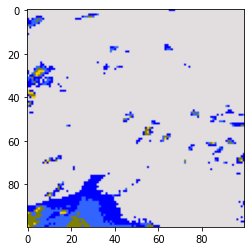

In [19]:
# Define maps from the values in images.h5 to both colours and the estimated rain values

colour_map = np.array([
    [199,191,193,128],  
    [0,0,0,0],
    [  0,   0, 254, 255],
    [ 50, 101, 254, 255],
    [127, 127,   0, 255],
    [254, 203,   0, 255],
    [254, 152,   0, 255],
    [254,   0,   0, 255],
    [254,   0, 254, 255],
    [229, 254, 254, 255]
])

rain_map = np.array([0, 0, 0.3, 0.75, 1.5, 3, 6, 12, 24, 32])

image_idx = 25
plt.imshow(colour_map[train_images[image_idx,:,:]]) # plot 2D image of a single radar image
rain_map[train_images[image_idx,:,:]].sum() # find the total amount of rain in that radar image


(23511,)

In [35]:
from scipy.stats.stats import pearsonr   
corrs = np.zeros((100, 100))

for i in range(0, 100):
  for j in range(0, 100):
    corr, _ = pearsonr(train_df.rain, train_images[:, i, j])
    corrs[i, j] = corr


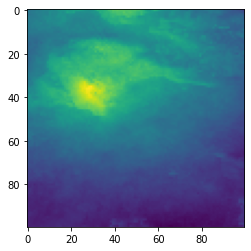

In [37]:
plt.imshow(corrs)